<a href="https://colab.research.google.com/github/SaurabhSRP/Stock-Price-Prediction-Projects/blob/main/Google_Stock_price_Forecasting_using_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import datetime 
from datetime import date , timedelta
import yfinance as yf

In [ ]:
today=date.today()
print(today)

2022-09-20


In [ ]:

end=today.strftime("%Y-%m-%d")
end_date=end

start=date.today()-timedelta(days=365)
start_date=start


In [ ]:
data=yf.download('GOOG',start=start_date,end=end_date,progress=False)

In [ ]:
data["Date"]=data.index
data=data[["Date","Open","High","Low","Close", "Adj Close", "Volume"]]
data.reset_index(drop=True,inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
247 2022-09-13  108.889999  109.370003  105.000000  105.309998  105.309998   
248 2022-09-14  105.440002  106.099998  104.500000  105.870003  105.870003   
249 2022-09-15  105.010002  106.209999  103.309998  103.900002  103.900002   
250 2022-09-16  102.970001  104.029999  101.855003  103.629997  103.629997   
251 2022-09-19  102.540001  104.019997  102.370003  103.849998  103.849998   

       Volume  
247  33015000  
248  22115800  
249  26494900  
250  64518900  
251  19721000  


In [ ]:
data=data[["Date","Close"]]
print(data.head())

        Date       Close
0 2021-09-20  139.016998
1 2021-09-21  139.646500
2 2021-09-22  140.938507
3 2021-09-23  141.826508
4 2021-09-24  142.632996


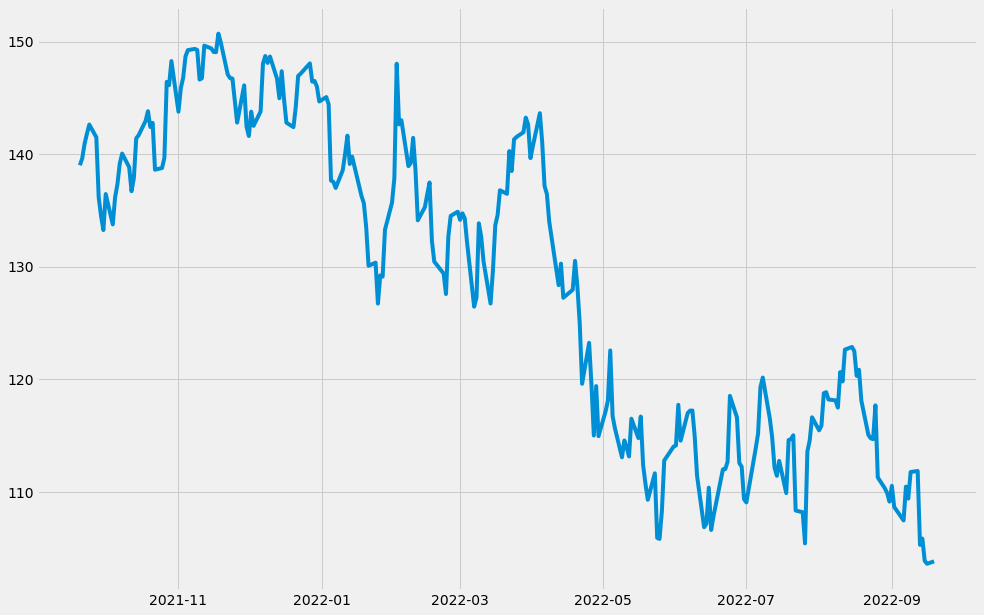

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(data["Date"],data["Close"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

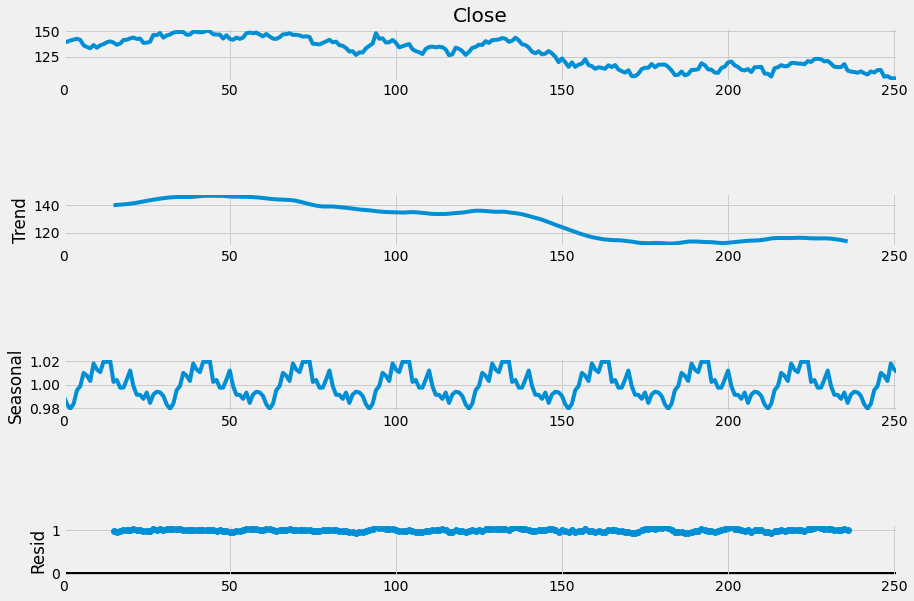

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data["Close"],model='multiplicative',freq=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

ARIMA 

p- using autocorrelation

q - using partial auto corelation

d - 0 if data is stationary ,1 if data is sesasonal

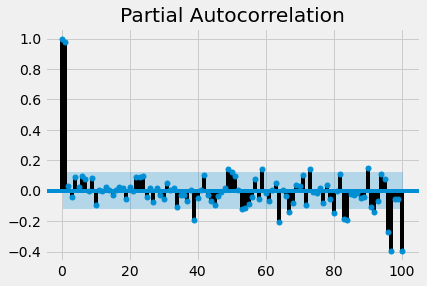

<Figure size 864x576 with 0 Axes>

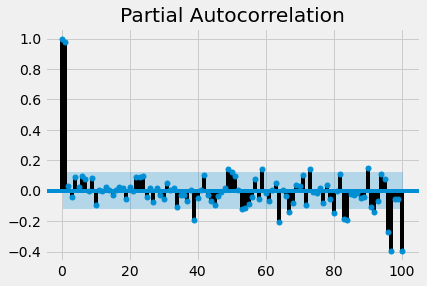

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plt.figure(figsize=(12,8))
plot_pacf(data["Close"],lags=100)

#fig=plt.figure(figsize=(12,8))
#ax1=fig.add_subplot(211)
#fig=sm.graphics.tsa.plot_acf(df['Seasonal First Difference'])
#ax2=fig.add_subplot(212)
#fig=sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

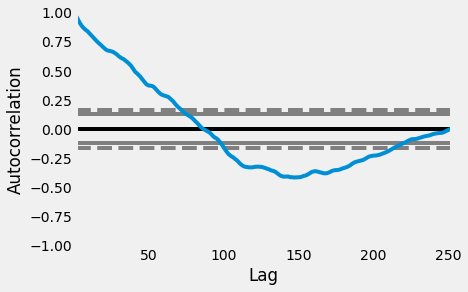

In [ ]:
pd.plotting.autocorrelation_plot(data["Close"])

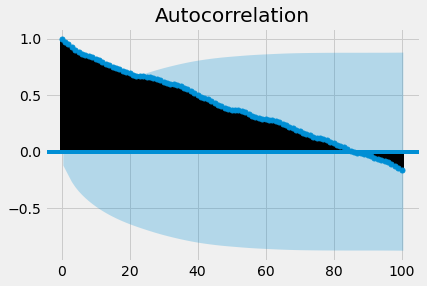

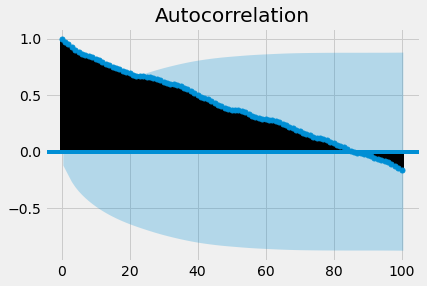

In [ ]:
plot_acf(data["Close"],lags=100)

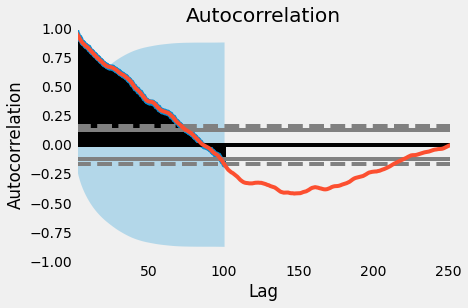

In [ ]:
plot_acf(data["Close"],lags=100)

pd.plotting.autocorrelation_plot(data["Close"])


value is wrong because ARIMA is bad for seasonal data

In [ ]:
import statsmodels.api as sm
import warnings

p,d,q=5,1,2
sm_model=sm.tsa.statespace.SARIMAX(data['Close'],order=(p,d,q),seasonal_order=(p,d,q,12))

sm_model=sm_model.fit()
print(sm_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -591.295
Date:                            Tue, 20 Sep 2022   AIC                           1212.589
Time:                                    17:03:36   BIC                           1264.736
Sample:                                         0   HQIC                          1233.603
                                            - 252                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1247      1.098     -0.114      0.910      -2.278       2.028
ar.L2          0.6023      0.693   

In [ ]:
pred=sm_model.predict(len(data),len(data)+10)
print(pred)

252    103.734611
253    104.142049
254    103.640930
255    103.433074
256    101.684029
257    101.605243
258    101.946160
259    103.215410
260    102.303006
261    102.565380
262    102.433022
Name: predicted_mean, dtype: float64


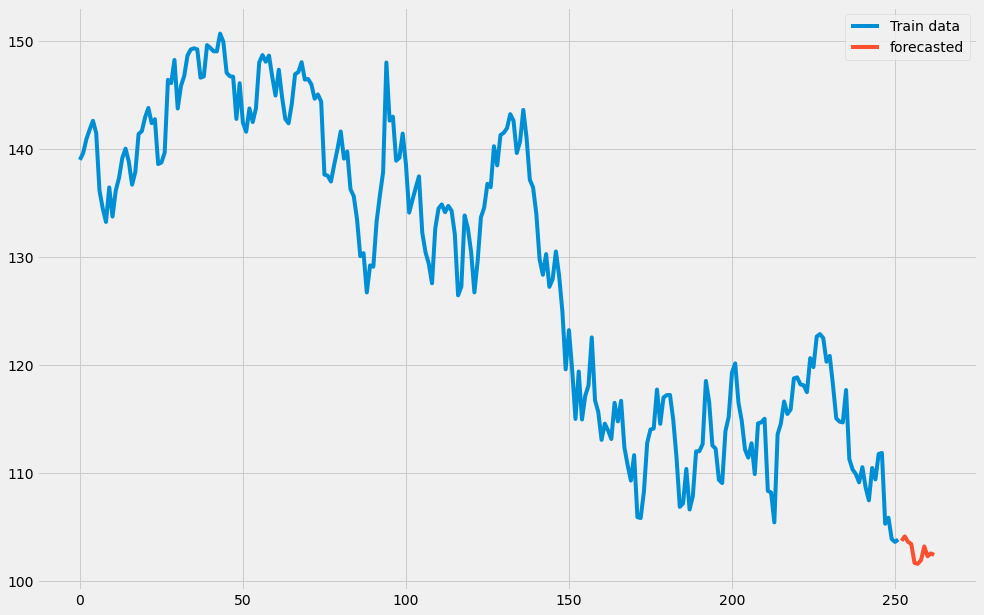

In [ ]:
data['Close'].plot(legend=True,label='Train data',figsize=(15,10))
pred.plot(legend=True,label='forecasted')